#Apresentação

Nosso trabalho compreende a análise exploratória de dados referentes ao conjunto de Datasets disponibilizados em
https://www.kaggle.com/datasets/imtkaggleteam/global-education?resource=download, os 4 Datasets são referentes a dados educacionais globais, sendo eles:

- 1- share-of-the-world-population-with-at-least-basic-education: Percentual da população adulta (mais de 15 anos) que receberam alguma educação formal.
- 2- learning-adjusted-years-of-school-lays: O número total de anos que as crianças passam na escola (considerando anos de qualidade recebem).
- 3- number-of-out-of-school-children: O número de crianças que não estão na escola no ensino primário e secundário por gênero.
- 4- gender-gap-education-levels: Taxas de matrícula no primário, secundário e superior por gênero.

In [93]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
share_pop = pd.read_csv("drive/MyDrive/ADA/1- share-of-the-world-population-with-at-least-basic-education.csv")

In [96]:
learning_school = pd.read_csv("drive/MyDrive/ADA/2- learning-adjusted-years-of-school-lays.csv")

In [97]:
school_children = pd.read_csv("drive/MyDrive/ADA/3- number-of-out-of-school-children.csv")

In [98]:
gender_gap = pd.read_csv("drive/MyDrive/ADA/4- gender-gap-education-levels.csv")

# Dataset 1 - Share of the world population with at least basic education

## Verificando o primeiro Dataset podemos notar que a tabela Code possui valores nulos.

In [99]:
share_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     468 non-null    object 
 1   Code                                                       350 non-null    object 
 2   Year                                                       468 non-null    int64  
 3   Share of population with no formal education, 1820-2020    468 non-null    float64
 4   Share of population with some formal education, 1820-2020  468 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.4+ KB


In [ ]:
share_pop.describe()

In [101]:
share_pop.head()

,Entity,Code,Year,"Share of population with no formal education, 1820-2020","Share of population with some formal education, 1820-2020"
0,Albania,ALB,2015,2.0,98.0
1,Albania,ALB,2020,1.0,99.0
2,Algeria,DZA,2015,16.0,84.0
3,Algeria,DZA,2020,13.0,87.0
4,Argentina,ARG,2015,2.0,98.0


In [ ]:
share_pop[share_pop.duplicated()].count()

In [ ]:
share_pop['Year'].unique()

In [ ]:
share_pop['Code'].unique()

In [ ]:
share_pop['Entity'].unique()

## A seguir verificamos qual pais/região está faltando o seu código.

In [106]:
share_pop[share_pop['Code'].isna()]['Entity'].unique()

array(['East Asia (OECD)', 'Eastern Europe (OECD)',
       'Latin America and Caribbean (OECD)',
       'Middle East and North Africa (OECD)',
       'South and South-East Asia (OECD)', 'Sub-Sahara Africa (OECD)',
       'Western Europe (OECD)', 'Western Offshoots (OECD)'], dtype=object)

In [ ]:
share_pop[share_pop['Code'].isna()]

## Para cada região que está faltando seu código optamos por criar e inserir um código para tal região. Antes verificamos se os códigos criados já não são utilizados por algum outro país/região.

In [108]:
list_code = ['EAS','EAE','LAC','MEN','SEA', 'SSA','WES','WEO']

for code in list_code:
  if code in share_pop['Code'].unique():
    print(code)

In [109]:
dict_code = {'East Asia (OECD)':'EAS','Eastern Europe (OECD)':'EAE','Latin America and Caribbean (OECD)':'LAC',
             'Middle East and North Africa (OECD)':'MEN','South and South-East Asia (OECD)':'SEA','Sub-Sahara Africa (OECD)':'SSA',
             'Western Europe (OECD)':'WES','Western Offshoots (OECD)':'WEO'}

def substitute_code(row):
    if pd.isna(row['Code']):
      return dict_code[row['Entity']]

    return  row['Code']

share_pop['Code'] = share_pop.apply(substitute_code, axis= 1)

In [110]:
share_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     468 non-null    object 
 1   Code                                                       468 non-null    object 
 2   Year                                                       468 non-null    int64  
 3   Share of population with no formal education, 1820-2020    468 non-null    float64
 4   Share of population with some formal education, 1820-2020  468 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.4+ KB


## Também padronizamos os nomes das colunas

In [111]:
share_pop.columns = ['Pais', 'Codigo', 'Ano', 'Sem_alguma_educacao_formal', 'Alguma_educacao_formal']

## Para ter uma base comparativa do percentual da população que possui alguma educação formal ao longo dos anos, agrupamos o Dataset pela coluna Ano, no entanto, podemos verificar que antes de 2015 os dados são escassos, se restringindo por região.

In [ ]:
share_pop.groupby('Ano').count()

In [113]:
code_list = ['EAS','LAC','MEN','SEA','SSA','WES','WEO','OWID_WRL']
filtered_df = share_pop[share_pop['Codigo'].isin(code_list) & ((share_pop['Ano']==2015) | (share_pop['Ano']==2020))]
filtered_df

,Pais,Codigo,Ano,Sem_alguma_educacao_formal,Alguma_educacao_formal
462,World,OWID_WRL,2015,14.0,86.0
463,World,OWID_WRL,2020,13.0,87.0


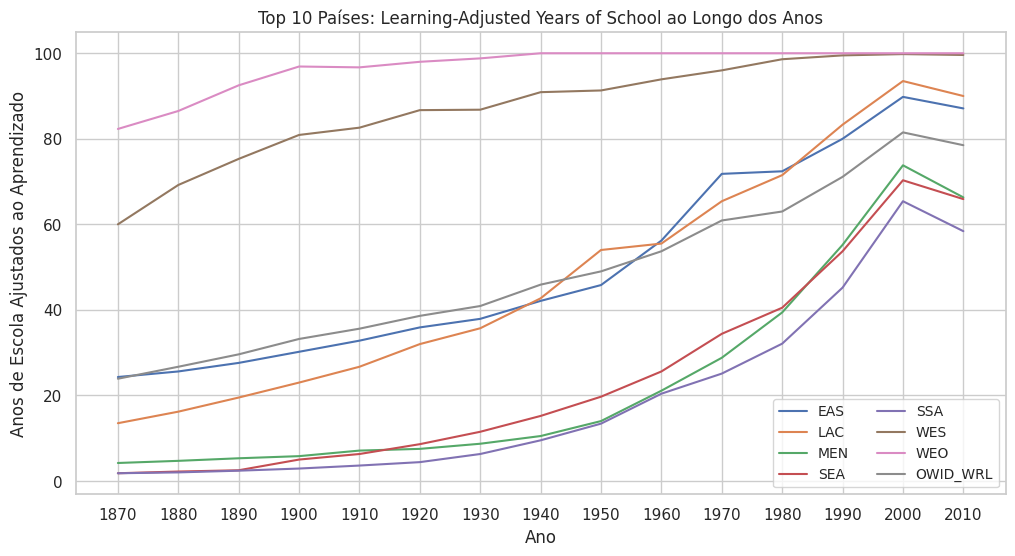

In [114]:
anos = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

plt.figure(figsize=(12, 6))
for code in code_list:
    code_data = share_pop[(share_pop['Codigo'] == code) & (share_pop['Ano'].isin(anos))]
    plt.plot(code_data['Ano'], code_data['Alguma_educacao_formal'], label=code)

plt.title('Top 10 Países: Learning-Adjusted Years of School ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Anos de Escola Ajustados ao Aprendizado')
plt.legend(loc='best', fontsize='small', ncol=2)

plt.grid(True)
plt.xticks(code_data['Ano'])  # Definir os anos como rótulos no eixo x
plt.show()

## Comparativo entre os anos de 2015 e 2020, 113 dos 166 paises presentes no estudo apresentaram melhora no acesso a algum nível formal de educação.

In [ ]:
coluna_condicao = share_pop[(share_pop['Ano'] == 2015) | (share_pop['Ano'] == 2020) & (share_pop['Pais']!='World')].groupby('Pais').count()['Codigo'] == 2
share_pop[(share_pop['Ano'] == 2015) | (share_pop['Ano'] == 2020) & (share_pop['Pais']!='World')].groupby('Pais').count()[coluna_condicao]

In [116]:
grouped = share_pop[((share_pop['Ano']==2015) | (share_pop['Ano']==2020)) & (share_pop['Pais']!='World')].groupby(['Pais'])
melhor_ano_condicao = share_pop.iloc[list(grouped['Alguma_educacao_formal'].idxmax())]
melhor_ano_condicao[melhor_ano_condicao['Ano']==2020]

,Pais,Codigo,Ano,Sem_alguma_educacao_formal,Alguma_educacao_formal
1,Albania,ALB,2020,1.0,99.0
3,Algeria,DZA,2020,13.0,87.0
7,Armenia,ARM,2020,0.0,100.0
9,Aruba,ABW,2020,5.0,95.0
11,Australia,AUS,2020,0.0,100.0
...,...,...,...,...,...
407,United States,USA,2020,0.0,100.0
411,Vanuatu,VUT,2020,11.0,89.0
413,Venezuela,VEN,2020,3.0,97.0
465,Zambia,ZMB,2020,5.0,95.0


## Com exceção do peŕiodo de 2000 a 2010, que apresentou piora no percentual da população mundial com algum nível de educação, todos os intervalos de tempo apresentaram melhora no percentual da população mundial com algum nível de educação.



# Análise e Limpeza (Dataset: learning_school)

In [117]:
learning_school.describe()

,Year,Learning-Adjusted Years of School
count,637.000000,637.000000
mean,2016.963893,8.017871
std,3.349216,2.547377
min,2010.000000,2.206502
25%,2017.000000,6.024927
50%,2018.000000,8.169077
75%,2020.000000,10.321753
max,2020.000000,12.937873


In [118]:
learning_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             637 non-null    object 
 1   Code                               601 non-null    object 
 2   Year                               637 non-null    int64  
 3   Learning-Adjusted Years of School  637 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.0+ KB


In [119]:
learning_school.head()

,Entity,Code,Year,Learning-Adjusted Years of School
0,Afghanistan,AFG,2017,4.870000
1,Afghanistan,AFG,2018,4.949788
2,Afghanistan,AFG,2020,5.052838
3,Africa,NaN,2017,4.931378
4,Africa,NaN,2018,5.123904


In [ ]:
learning_school['Entity'].unique()

In [121]:
valores_nulos = learning_school.isnull().sum()
valores_nulos

Entity                                0
Code                                 36
Year                                  0
Learning-Adjusted Years of School     0
dtype: int64

In [122]:
learning_school = learning_school.dropna(subset=['Code'])
learning_school

,Entity,Code,Year,Learning-Adjusted Years of School
0,Afghanistan,AFG,2017,4.870000
1,Afghanistan,AFG,2018,4.949788
2,Afghanistan,AFG,2020,5.052838
6,Albania,ALB,2010,7.382478
7,Albania,ALB,2017,8.920000
...,...,...,...,...
632,Zambia,ZMB,2020,5.036293
633,Zimbabwe,ZWE,2010,6.835774
634,Zimbabwe,ZWE,2017,6.350000
635,Zimbabwe,ZWE,2018,7.006610


In [ ]:
learning_school.duplicated()

In [124]:
learning_school['Learning-Adjusted Years of School'] = learning_school['Learning-Adjusted Years of School'].round(1)
learning_school

<ipython-input-124-0b4a46dd36d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learning_school['Learning-Adjusted Years of School'] = learning_school['Learning-Adjusted Years of School'].round(1)


,Entity,Code,Year,Learning-Adjusted Years of School
0,Afghanistan,AFG,2017,4.9
1,Afghanistan,AFG,2018,4.9
2,Afghanistan,AFG,2020,5.1
6,Albania,ALB,2010,7.4
7,Albania,ALB,2017,8.9
...,...,...,...,...
632,Zambia,ZMB,2020,5.0
633,Zimbabwe,ZWE,2010,6.8
634,Zimbabwe,ZWE,2017,6.4
635,Zimbabwe,ZWE,2018,7.0


In [125]:
learning_school.rename(columns={
    'Entity': 'Pais',
    'Code': 'Codigo',
    'Year': 'Ano',
    'Learning-Adjusted Years of School': 'Anos de Escola Ajustados ao Aprendizado'
}, inplace=True)

<ipython-input-125-bcdbb6d2b97f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learning_school.rename(columns={


In [126]:

years = [2017, 2018, 2020, 2010]
learning_school_filtered = learning_school[learning_school['Ano'].isin(years)]

In [127]:
mean_by_entity = learning_school_filtered.groupby('Pais')['Anos de Escola Ajustados ao Aprendizado'].mean()


In [128]:
top_countries = mean_by_entity.nlargest(10).index


In [129]:
top_countries_data = learning_school_filtered[learning_school_filtered['Pais'].isin(top_countries)]

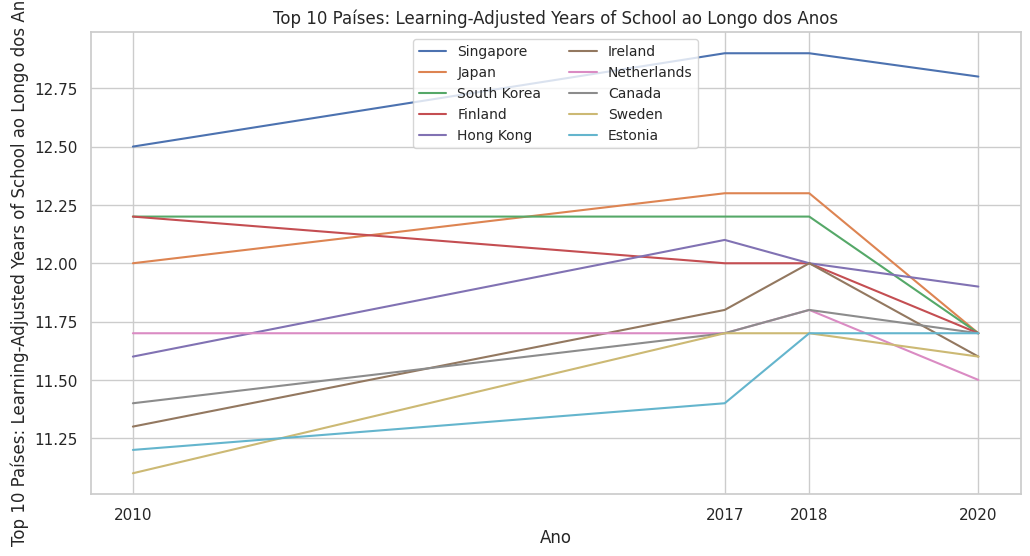

In [130]:
plt.figure(figsize=(12, 6))
for entity in top_countries:
    entity_data = top_countries_data[top_countries_data['Pais'] == entity]
    plt.plot(entity_data['Ano'], entity_data['Anos de Escola Ajustados ao Aprendizado'], label=entity)

plt.title('Top 10 Países: Learning-Adjusted Years of School ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Top 10 Países: Learning-Adjusted Years of School ao Longo dos Anos')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.xticks(entity_data['Ano'])


plt.grid(True)
plt.show()

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
years = [2017, 2018, 2020, 2010]
learning_school_filtered = learning_school[learning_school['Ano'].isin(years)]

In [133]:
mean_by_year = learning_school_filtered.groupby('Ano')['Anos de Escola Ajustados ao Aprendizado'].mean()

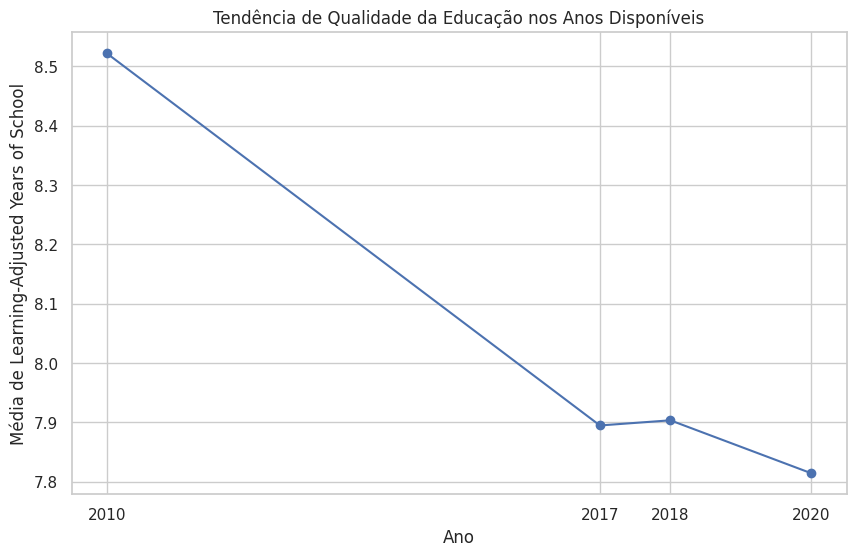

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(mean_by_year.index, mean_by_year.values, marker='o', linestyle='-')

plt.title('Tendência de Qualidade da Educação nos Anos Disponíveis')
plt.xlabel('Ano')
plt.ylabel('Média de Learning-Adjusted Years of School')
plt.grid(True)
plt.xticks(mean_by_year.index)  # Definir os anos como rótulos no eixo x
plt.show()

# Dataset 3

In [135]:
school_children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Entity                                                                                              2580 non-null   object 
 1   Code                                                                                                2080 non-null   object 
 2   Year                                                                                                2580 non-null   int64  
 3   Out-of-school children, adolescents and youth of primary and secondary school age, male (number)    2577 non-null   float64
 4   Out-of-school children, adolescents and youth of primary and secondary school age, female (number)  2577 non-null  

In [136]:
school_children.isnull().sum()

Entity                                                                                                  0
Code                                                                                                  500
Year                                                                                                    0
Out-of-school children, adolescents and youth of primary and secondary school age, male (number)        3
Out-of-school children, adolescents and youth of primary and secondary school age, female (number)      3
dtype: int64

In [137]:
school_children.head()

,Entity,Code,Year,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)"
0,Albania,ALB,2000,78614.0,81341.0
1,Albania,ALB,2001,77837.0,78849.0
2,Albania,ALB,2013,27879.0,21727.0
3,Albania,ALB,2014,21542.0,16571.0
4,Albania,ALB,2015,18407.0,13250.0


In [138]:
school_children.tail()

,Entity,Code,Year,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)"
2575,Zimbabwe,ZWE,2001,386981.0,474012.0
2576,Zimbabwe,ZWE,2002,462514.0,550123.0
2577,Zimbabwe,ZWE,2003,522317.0,600606.0
2578,Zimbabwe,ZWE,2012,284958.0,333954.0
2579,Zimbabwe,ZWE,2013,277406.0,320425.0


In [ ]:
school_children.describe()

In [140]:
school_children['Year'].unique()

array([2000, 2001, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1984, 2008,
       2009, 2010, 2012, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2002,
       2003, 2004, 2005, 2006, 2007, 2011])

In [ ]:
school_children['Code'].unique()

In [ ]:
school_children['Entity'].unique()

In [143]:
school_children = school_children.drop_duplicates()
school_children = school_children.dropna()
display(school_children)

,Entity,Code,Year,"Out-of-school children, adolescents and youth of primary and secondary school age, male (number)","Out-of-school children, adolescents and youth of primary and secondary school age, female (number)"
0,Albania,ALB,2000,78614.0,81341.0
1,Albania,ALB,2001,77837.0,78849.0
2,Albania,ALB,2013,27879.0,21727.0
3,Albania,ALB,2014,21542.0,16571.0
4,Albania,ALB,2015,18407.0,13250.0
...,...,...,...,...,...
2575,Zimbabwe,ZWE,2001,386981.0,474012.0
2576,Zimbabwe,ZWE,2002,462514.0,550123.0
2577,Zimbabwe,ZWE,2003,522317.0,600606.0
2578,Zimbabwe,ZWE,2012,284958.0,333954.0


In [144]:
school_children.rename(columns={'Year':'Ano'}, inplace=True)
school_children.rename(columns={'Code':'Codigo'}, inplace=True)
school_children.rename(columns={'Entity':'Pais'}, inplace=True)
school_children.rename(columns={'Out-of-school children, adolescents and youth of primary and secondary school age, male (number)': 'masculino'}, inplace=True)
school_children.rename(columns={'Out-of-school children, adolescents and youth of primary and secondary school age, female (number)': 'feminino'}, inplace=True)

In [145]:
school_children.columns.tolist()

['Pais', 'Codigo', 'Ano', 'masculino', 'feminino']

In [146]:
school_children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2579
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pais       2074 non-null   object 
 1   Codigo     2074 non-null   object 
 2   Ano        2074 non-null   int64  
 3   masculino  2074 non-null   float64
 4   feminino   2074 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 97.2+ KB




# Análises e Gráficos





In [147]:
dados_feminino_2019 = school_children[school_children['Ano'] == 2019]
dados_2019_sorted = dados_feminino_2019.sort_values(by='feminino', ascending=False)
top_5_regioes_2019 = dados_2019_sorted.head(5)
print(top_5_regioes_2019[['Pais', 'feminino']])


               Pais     feminino
2567          World  127716590.0
501            Chad    1472056.0
560   Cote d'Ivoire    1284320.0
383    Burkina Faso    1213740.0
1488     Madagascar     937437.0





*   No Chade, havia 1.47 milhões de meninas fora da escola em 2019, abrangendo crianças, adolescentes e jovens em idade escolar primária e secundária.

*  Na Costa do Marfim, havia 1.28 milhões de meninas fora da escola em 2019, incluindo crianças, adolescentes e jovens em idade escolar primária e secundária.

*   Em Burkina Faso, o número de meninas fora da escola em 2019 foi de 1.21 milhões, incluindo crianças, adolescentes e jovens em idade escolar primária e secundária.

*  Em Madagascar, houve 937 mil meninas fora da escola em 2019, abrangendo crianças, adolescentes e jovens em idade escolar primária e secundária.






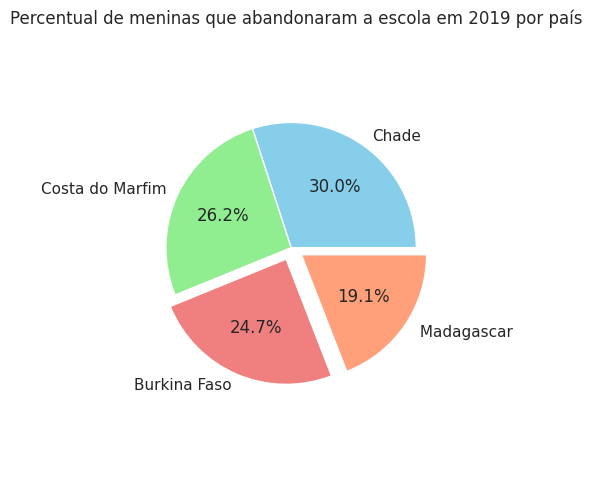

In [148]:
top_5_regioes_2019 = {
    'Regioes': ['Chade', 'Costa do Marfim', 'Burkina Faso', ' Madagascar '],
    'Feminino': [1472056.0, 1284320.0, 1213740.0,  937437.0 ]
}

paises = top_5_regioes_2019['Regioes']
feminino = top_5_regioes_2019['Feminino']

explode = (0, 0, 0.1, 0.1)
plt.figure(figsize=(5, 5))
plt.pie(feminino, labels=paises, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'], explode=explode)
plt.title('Percentual de meninas que abandonaram a escola em 2019 por país')
plt.axis('equal')
plt.tight_layout()

plt.show()


In [149]:
dados_masculino_2019 = school_children[school_children['Ano'] == 2019]
dados_2019_sorted = dados_masculino_2019.sort_values(by='masculino', ascending=False)
top_5_regioes_2019 = dados_2019_sorted.head(5)
print(top_5_regioes_2019[['Pais', 'masculino']])

               Pais    masculino
2567          World  129325630.0
383    Burkina Faso    1291645.0
501            Chad    1041447.0
1488     Madagascar    1039626.0
560   Cote d'Ivoire     957509.0





*   Em Burkina Faso, havia 1.29 milhões de meninos fora da escola em 2019, abrangendo crianças, adolescentes e jovens em idade escolar primária e secundária.
*   No Chade, havia 1.04 milhões de meninos fora da escola em 2019, incluindo crianças, adolescentes e jovens em idade escolar primária e secundária.

*   Em Madagascar, o número de meninos fora da escola em 2019 foi de 1.04 milhões, incluindo crianças, adolescentes e jovens em idade escolar primária e secundária.
*   Na Costa do Marfim, houve 957 mil meninos fora da escola em 2019, abrangendo crianças, adolescentes e jovens em idade escolar primária e secundária.










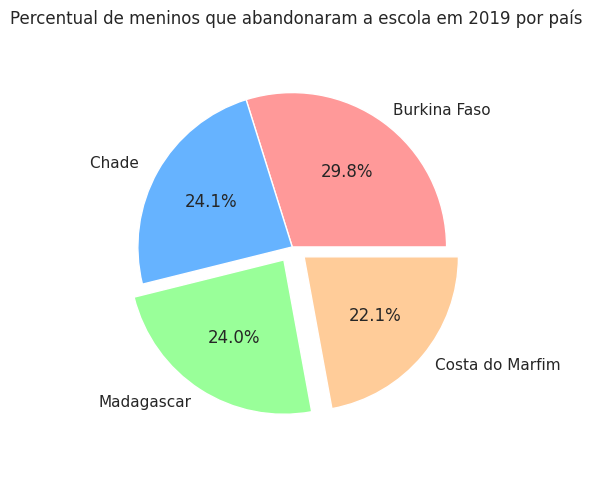

In [150]:
top_5_regioes_2019 = {
    'Regioes': ['Burkina Faso', 'Chade ', 'Madagascar', 'Costa do Marfim'],
    'Masculino': [1291645.0,  1041447.0, 1039626.0,  957509.0]
}

paises = top_5_regioes_2019['Regioes']
masculino = top_5_regioes_2019['Masculino']

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = (0, 0, 0.1, 0.1)

plt.figure(figsize=(5, 5))
plt.pie(masculino, labels=paises, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title('Percentual de meninos que abandonaram a escola em 2019 por país')
plt.axis('equal')
plt.tight_layout()

plt.show()

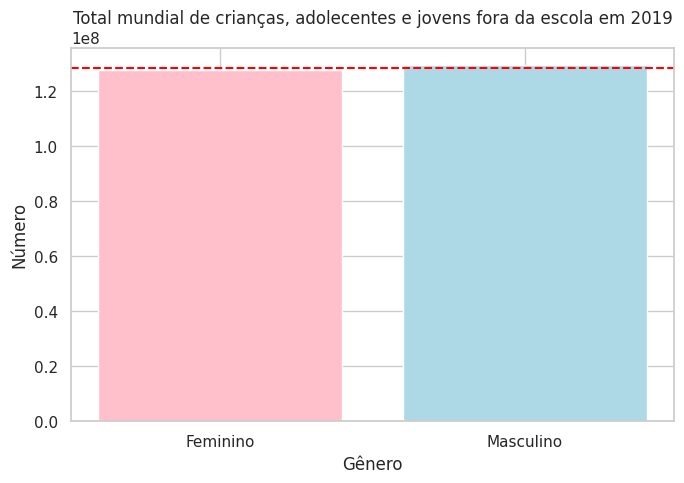

In [151]:
categorias = ['Feminino', 'Masculino']
valores = [127716590.0, 129325630.0]

plt.figure(figsize=(7, 5))
plt.bar(categorias, valores, color=['pink', 'lightblue'])
plt.xlabel('Gênero')
plt.ylabel('Número')
plt.title('Total mundial de crianças, adolecentes e jovens fora da escola em 2019')
plt.axhline(sum(valores) / len(valores), color='red', linestyle='--', linewidth=1.5 )

plt.tight_layout()

plt.show()


127.7 milhões de meninas fora da escola em 2019, abrangendo crianças, adolescentes e jovens em idade escolar primária e secundária.

129.3 milhões de meninos fora da escola em 2019, abrangendo crianças, adolescentes e jovens em idade escolar primária e secundária.


#Dataset 4

In [152]:
gender_gap.describe()


,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
count,9228.000000,8251.000000,8251.000000,6538.000000,6538.000000,6855.000000,6855.000000
mean,1960.161032,19.170464,16.506685,32.055344,31.498507,53.364914,59.137355
std,60.482116,27.995750,21.995645,35.751953,37.043541,38.688078,37.319553
min,1820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1915.000000,0.000000,0.060000,0.140000,0.010000,6.920000,19.710000
50%,1991.000000,3.167690,5.653580,12.047725,6.580000,64.800030,74.000000
75%,2007.000000,30.156035,27.061165,69.839107,72.712023,90.564715,93.026330
max,2021.000000,152.656900,149.406390,100.000000,100.000000,100.000000,99.991820


In [153]:
gender_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 9 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         9228 non-null   object 
 1   Code                                                           8562 non-null   object 
 2   Year                                                           9228 non-null   int64  
 3   Combined gross enrolment ratio for tertiary education, female  8251 non-null   float64
 4   Combined gross enrolment ratio for tertiary education, male    8251 non-null   float64
 5   Combined total net enrolment rate, secondary, male             6538 non-null   float64
 6   Combined total net enrolment rate, secondary, female           6538 non-null   float64
 7   Combined total net enrolment rate, primary, female           

In [154]:
gender_gap.head()

,Entity,Code,Year,"Combined gross enrolment ratio for tertiary education, female","Combined gross enrolment ratio for tertiary education, male","Combined total net enrolment rate, secondary, male","Combined total net enrolment rate, secondary, female","Combined total net enrolment rate, primary, female","Combined total net enrolment rate, primary, male"
0,Afghanistan,AFG,1986,0.62182,3.60227,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,1.40606,2.96306,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2003,0.51657,1.82170,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2004,0.51396,1.82145,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2009,1.41213,5.97378,NaN,NaN,NaN,NaN


In [155]:
gender_gap.rename(columns={'Entity': 'Pais'}, inplace=True)

In [156]:
gender_gap.rename(columns={'Code': 'Codigo'}, inplace=True)
gender_gap.rename(columns={'Year': 'Ano'}, inplace=True)
gender_gap.rename(columns={'Combined gross enrolment ratio for tertiary education, female': 'Taxa Matricula Superior Mulheres'}, inplace=True)

In [157]:
gender_gap.rename(columns={'Combined gross enrolment ratio for tertiary education, male': 'Taxa Matricula Superior Homens'}, inplace=True)
gender_gap.rename(columns={'Combined total net enrolment rate, secondary, male': 'Taxa Matricula secundario Homens'}, inplace=True)
gender_gap.rename(columns={'Combined total net enrolment rate, secondary, female': 'Taxa Matricula secundario Mulheres'}, inplace=True)
gender_gap.rename(columns={'Combined total net enrolment rate, primary, female': 'Taxa Matricula primario Mulheres'}, inplace=True)
gender_gap.rename(columns={'Combined total net enrolment rate, primary, male': 'Taxa Matricula primario Homens'}, inplace=True)


In [158]:
gender_gap['Pais'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and Pacific (WB)', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Euro

In [159]:
gender_gap.isnull().sum()

Pais                                     0
Codigo                                 666
Ano                                      0
Taxa Matricula Superior Mulheres       977
Taxa Matricula Superior Homens         977
Taxa Matricula secundario Homens      2690
Taxa Matricula secundario Mulheres    2690
Taxa Matricula primario Mulheres      2373
Taxa Matricula primario Homens        2373
dtype: int64

In [160]:
gender_gap.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9223    False
9224    False
9225    False
9226    False
9227    False
Length: 9228, dtype: bool

ANALISANDO DADOS

In [161]:
def top_5_entidades_2015():

    dados_2015 = gender_gap[gender_gap['Ano'] == 2015]

    dados_2015_sorted = dados_2015.sort_values(by='Taxa Matricula Superior Mulheres', ascending=False)

    top_5_entidades_2015 = dados_2015_sorted.head(5)

    return top_5_entidades_2015[['Pais', 'Taxa Matricula Superior Mulheres']]

resultado = top_5_entidades_2015()

print(resultado)

                       Pais  Taxa Matricula Superior Mulheres
390               Australia                         140.95175
7110  Saint Kitts and Nevis                         115.88089
6880            Puerto Rico                         114.48715
263               Argentina                         104.51591
8763          United States                         102.74733


In [162]:
def top_5_entidades_2015():

    dados_2015 = gender_gap[gender_gap['Ano'] == 2015]

    dados_2015_sorted = dados_2015.sort_values(by='Taxa Matricula Superior Homens', ascending=False)

    top_5_entidades_2015 = dados_2015_sorted.head(5)

    return top_5_entidades_2015[['Pais', 'Taxa Matricula Superior Homens']]

resultado = top_5_entidades_2015()

print(resultado)

             Pais  Taxa Matricula Superior Homens
7681  South Korea                       105.28522
8530       Turkey                       101.66500
390     Australia                        97.58070
3302      Grenada                        88.84789
1562        Chile                        80.73681


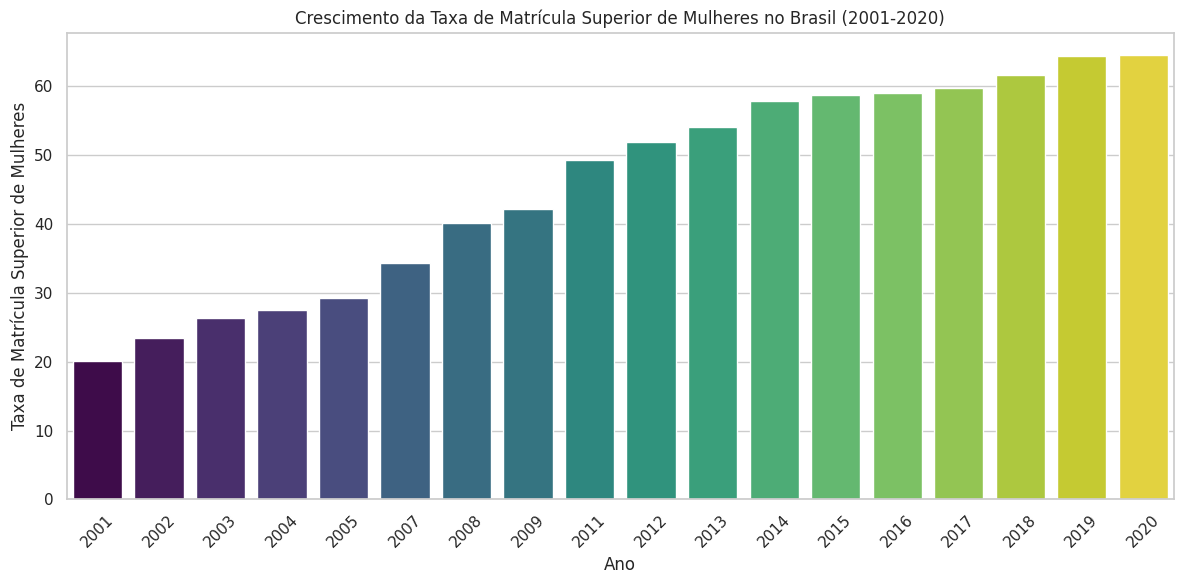

In [163]:
data_filtered = gender_gap[(gender_gap['Pais'] == 'Brazil') & (~gender_gap['Ano'].isin([2006, 2010]))]

data_filtered = data_filtered[(data_filtered['Ano'] >= 2001) & (data_filtered['Ano'] <= 2020)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Ano', y='Taxa Matricula Superior Mulheres', hue='Ano', data=data_filtered, palette='viridis', dodge=False, legend=False)
plot.set_title('Crescimento da Taxa de Matrícula Superior de Mulheres no Brasil (2001-2020)')
plot.set_xlabel('Ano')
plot.set_ylabel('Taxa de Matrícula Superior de Mulheres')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()

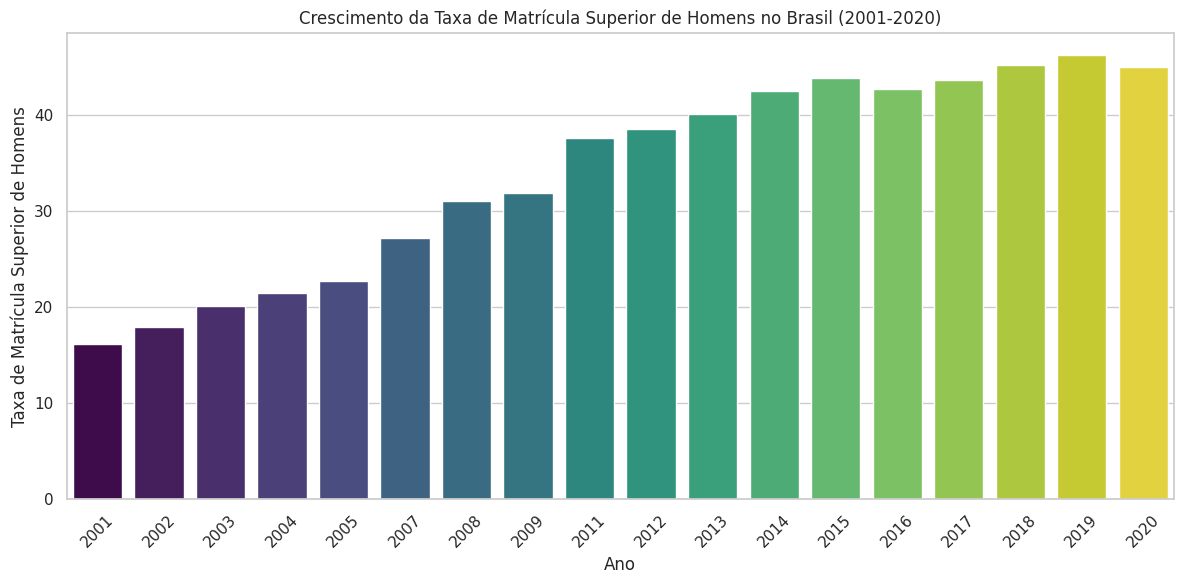

In [164]:
data_filtered = gender_gap[(gender_gap['Pais'] == 'Brazil') & (~gender_gap['Ano'].isin([2006, 2010]))]

data_filtered = data_filtered[(data_filtered['Ano'] >= 2001) & (data_filtered['Ano'] <= 2020)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plot = sns.barplot(x='Ano', y='Taxa Matricula Superior Homens', hue='Ano', data=data_filtered, palette='viridis', dodge=False, legend=False)
plot.set_title('Crescimento da Taxa de Matrícula Superior de Homens no Brasil (2001-2020)')
plot.set_xlabel('Ano')
plot.set_ylabel('Taxa de Matrícula Superior de Homens')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()

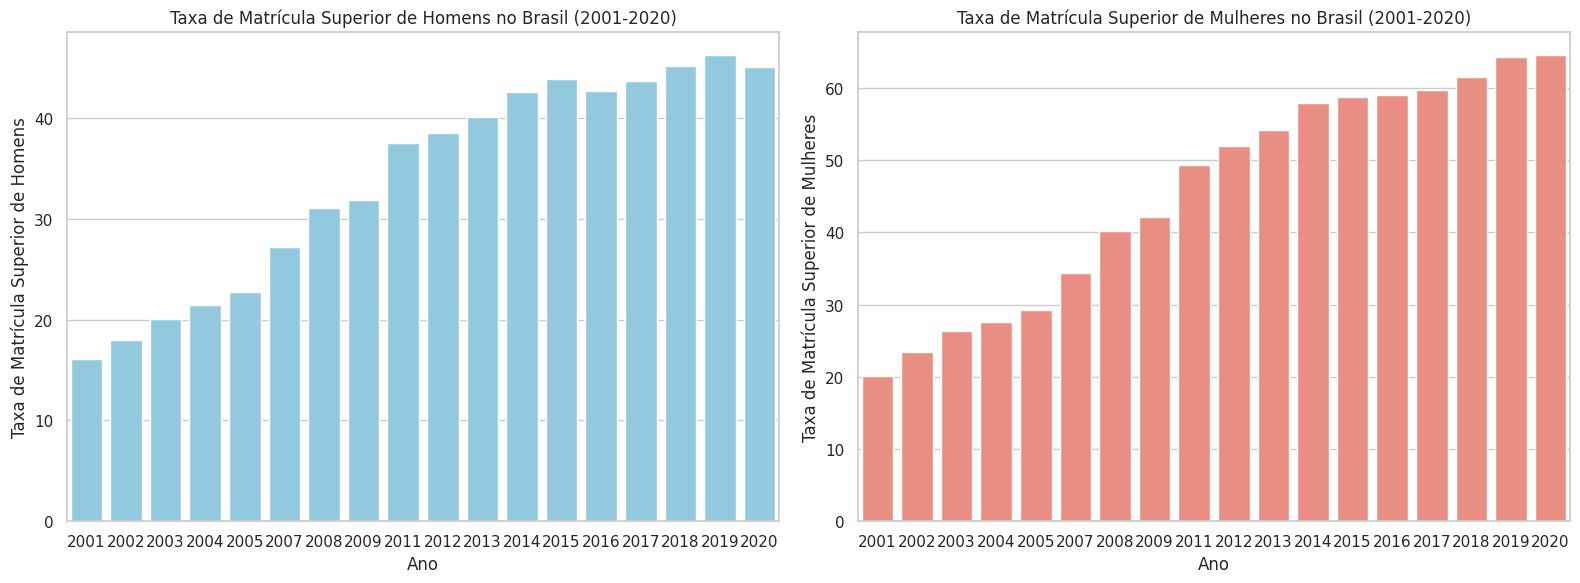

In [165]:
data_filtered = gender_gap[(gender_gap['Pais'] == 'Brazil') & (~gender_gap['Ano'].isin([2006, 2010]))]

data_filtered = data_filtered[(data_filtered['Ano'] >= 2001) & (data_filtered['Ano'] <= 2020)]

sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plot_homens = sns.barplot(x='Ano', y='Taxa Matricula Superior Homens', data=data_filtered, color='skyblue')
plot_homens.set_title('Taxa de Matrícula Superior de Homens no Brasil (2001-2020)')
plot_homens.set_xlabel('Ano')
plot_homens.set_ylabel('Taxa de Matrícula Superior de Homens')

plt.subplot(1, 2, 2)
plot_mulheres = sns.barplot(x='Ano', y='Taxa Matricula Superior Mulheres', data=data_filtered, color='salmon')
plot_mulheres.set_title('Taxa de Matrícula Superior de Mulheres no Brasil (2001-2020)')
plot_mulheres.set_xlabel('Ano')
plot_mulheres.set_ylabel('Taxa de Matrícula Superior de Mulheres')

plt.tight_layout()

plt.show()

Fonte dos Dados STEM https://ilostat.ilo.org/how-many-women-work-in-stem/

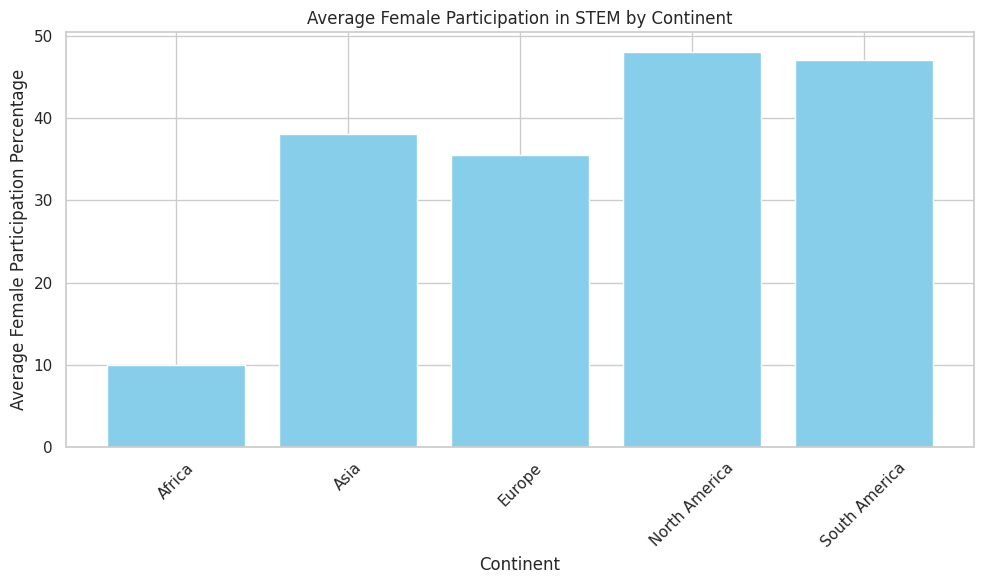

In [166]:
data = {
    'Country': ['Austria', 'Czechia', 'United States', 'Brazil', 'Nepal', 'Niger'],
    'Continent': ['Europe', 'Europe', 'North America', 'South America', 'Asia', 'Africa'],
    'Female_Participation_Percentage': [35, 36, 48, 47, 38, 10]
}

df = pd.DataFrame(data)

continent_mean = df.groupby('Continent')['Female_Participation_Percentage'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(continent_mean['Continent'], continent_mean['Female_Participation_Percentage'], color='skyblue')
plt.title('Average Female Participation in STEM by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Female Participation Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Merge

In [167]:
merged_df = school_children.set_index('Codigo').merge(learning_school.set_index('Codigo'))
merged_df['Proporcao_Masc_Fem'] = merged_df['feminino'] / (merged_df['masculino'] + merged_df['feminino'])
merged_df

,Pais,Ano,masculino,feminino,Anos de Escola Ajustados ao Aprendizado,Proporcao_Masc_Fem
0,Albania,2017,20594.0,11519.0,8.9,0.358702
1,Albania,2018,21066.0,9505.0,8.9,0.310916
2,Antigua and Barbuda,2018,288.0,208.0,8.1,0.419355
3,Argentina,2010,276512.0,142669.0,8.2,0.340352
4,Argentina,2017,157961.0,80216.0,8.9,0.336792
...,...,...,...,...,...,...
221,United Kingdom,2018,83413.0,79306.0,11.5,0.487380
222,United States,2010,1021515.0,867755.0,10.4,0.459307
223,United States,2017,422042.0,314850.0,11.1,0.427267
224,United States,2018,344551.0,289900.0,10.8,0.456930


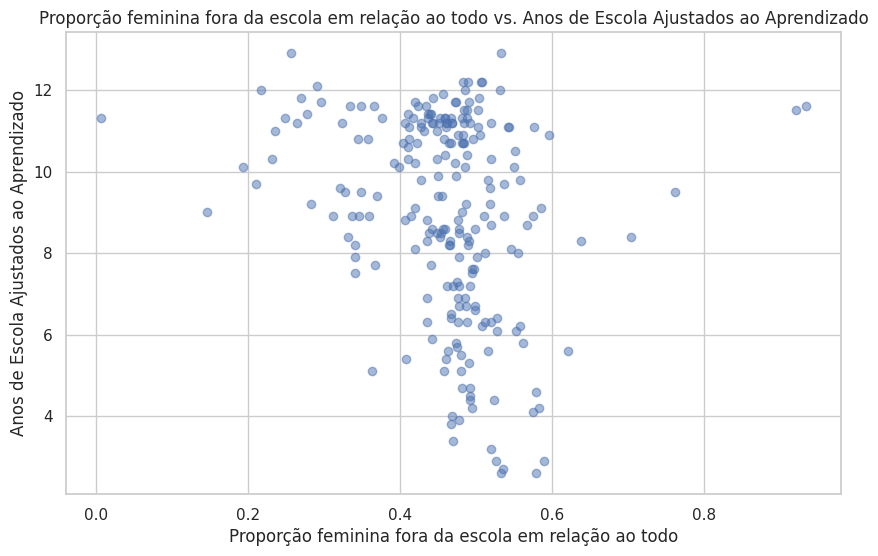

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Proporcao_Masc_Fem'], merged_df['Anos de Escola Ajustados ao Aprendizado'], alpha=0.5)
plt.title('Proporção feminina fora da escola em relação ao todo vs. Anos de Escola Ajustados ao Aprendizado')
plt.xlabel('Proporção feminina fora da escola em relação ao todo')
plt.ylabel('Anos de Escola Ajustados ao Aprendizado')
plt.grid(True)
plt.show()


In [169]:
gender_gap.dropna(inplace=True)

In [170]:
merged_df = gender_gap.set_index('Codigo').merge(learning_school.set_index('Codigo'))
merged_df

,Pais,Ano,Taxa Matricula Superior Mulheres,Taxa Matricula Superior Homens,Taxa Matricula secundario Homens,Taxa Matricula secundario Mulheres,Taxa Matricula primario Mulheres,Taxa Matricula primario Homens,Anos de Escola Ajustados ao Aprendizado
0,Australia,2017,133.33777,93.83847,91.89515,92.69355,96.74048,96.04001,11.6
1,Azerbaijan,2018,29.69345,25.90973,88.86419,88.15416,92.24746,92.57672,9.4
2,Bahrain,2018,67.84063,36.99245,86.97008,93.78209,95.85031,97.56867,9.5
3,Belgium,2010,75.92278,59.95715,92.22014,93.18099,97.45188,97.06578,11.2
4,Belgium,2017,90.46261,69.28979,94.81871,95.08123,98.87476,98.65984,11.1
...,...,...,...,...,...,...,...,...,...
92,Turkey,2017,102.44184,116.43595,88.36550,86.04436,87.18836,88.58257,8.9
93,Ukraine,2010,89.53580,71.25946,85.74998,86.24491,90.68996,90.14763,10.3
94,United Kingdom,2010,67.52451,50.53971,95.56562,96.79978,97.98666,98.03254,11.3
95,United Kingdom,2017,69.37931,50.97231,97.03468,97.23472,99.34894,99.62836,11.5


In [171]:
merged_df = gender_gap.set_index('Codigo').merge(school_children.set_index('Codigo'))
merged_df

,Pais,Ano,Taxa Matricula Superior Mulheres,Taxa Matricula Superior Homens,Taxa Matricula secundario Homens,Taxa Matricula secundario Mulheres,Taxa Matricula primario Mulheres,Taxa Matricula primario Homens,masculino,feminino
0,Albania,2000,18.269570,12.703270,67.504370,65.854550,95.367900,95.39781,78614.0,81341.0
1,Albania,2001,19.047660,12.602960,69.367660,67.426930,94.456520,93.31560,77837.0,78849.0
2,Albania,2013,76.316510,54.229680,83.807820,85.034660,93.704490,90.33588,27879.0,21727.0
3,Argentina,1975,27.200000,27.200000,39.080000,45.000000,97.000000,95.03000,583087.0,563703.0
4,Armenia,2007,51.877260,39.713260,91.295080,91.985810,89.249420,86.67222,15355.0,11484.0
...,...,...,...,...,...,...,...,...,...,...
934,World,1970,6.577590,12.357069,34.645035,29.369312,68.969710,74.86995,138625170.0,179656560.0
935,World,1975,8.960716,13.858430,45.223705,36.585293,72.921524,83.38727,140292020.0,177841200.0
936,World,1980,10.230970,14.182990,47.954388,38.931232,75.823044,81.60121,152836980.0,201979100.0
937,Yemen,1999,4.686870,16.700730,47.608860,18.890210,41.640620,71.30943,771851.0,1724635.0


In [172]:
merged_df[merged_df["Pais"] =='World']

,Pais,Ano,Taxa Matricula Superior Mulheres,Taxa Matricula Superior Homens,Taxa Matricula secundario Homens,Taxa Matricula secundario Mulheres,Taxa Matricula primario Mulheres,Taxa Matricula primario Homens,masculino,feminino
913,World,1998,17.102050,17.555460,56.137210,51.540270,78.888470,85.04458,173470800.0,208205740.0
914,World,1999,18.282290,18.496240,56.273190,51.832730,79.899250,85.43324,173209600.0,206368430.0
915,World,2000,19.004970,19.108700,57.053310,52.717530,80.683040,85.90070,172121520.0,203241540.0
916,World,2001,20.300280,20.276190,57.391930,53.609130,81.011120,86.05532,172410380.0,200525860.0
917,World,2002,21.919890,21.402320,57.670750,54.370000,81.397470,86.11807,170557100.0,195951940.0
918,World,2003,23.112310,22.509580,58.272670,55.555340,83.539280,86.62903,166447540.0,182673020.0
919,World,2004,24.099230,23.235080,58.987510,56.577070,84.721360,87.51837,162795300.0,176428060.0
920,World,2005,24.913780,23.747660,59.493440,57.446940,85.440830,88.05403,159207700.0,171084620.0
921,World,2006,25.975140,24.380910,60.029870,58.152020,86.011050,88.33337,156645730.0,166120530.0
922,World,2007,26.925230,25.163250,60.967260,59.157080,87.162410,89.63845,146501550.0,157003460.0


## Dataset - Numero de Filhos por mulher




Para agregar dados demograficos adcionamos o dataset proviniente deste link

https://data.worldbank.org/indicator/SP.DYN.TFRT.IN?end=2021&start=1960&view=chart

In [173]:
natalidade = pd.read_csv("drive/MyDrive/ADA/fertility.csv")

In [174]:
natalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            253 non-null    float64
 5   1961            252 non-null    float64
 6   1962            253 non-null    float64
 7   1963            252 non-null    float64
 8   1964            253 non-null    float64
 9   1965            253 non-null    float64
 10  1966            253 non-null    float64
 11  1967            253 non-null    float64
 12  1968            253 non-null    float64
 13  1969            253 non-null    float64
 14  1970            254 non-null    float64
 15  1971            254 non-null    float64
 16  1972            254 non-null    float64
 17  1973            254 non-null    flo

In [175]:
natalidade = natalidade.drop(['2022', 'Unnamed: 67','Indicator Code','Indicator Name'], axis=1)

In [176]:
natalidade.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,2.028000,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000
1,Africa Eastern and Southern,AFE,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,...,4.879018,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709
2,Afghanistan,AFG,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,...,5.830000,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000
3,Africa Western and Central,AFW,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,...,5.580892,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,6.039000,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000


In [177]:
natalidade.rename(columns={
    'Country Name': 'Pais',
    'Country Code': 'Codigo',
}, inplace=True)

In [178]:
natalidade_sanitizado = natalidade.dropna()

In [179]:
natalidade_sanitizado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 265
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pais    252 non-null    object 
 1   Codigo  252 non-null    object 
 2   1960    252 non-null    float64
 3   1961    252 non-null    float64
 4   1962    252 non-null    float64
 5   1963    252 non-null    float64
 6   1964    252 non-null    float64
 7   1965    252 non-null    float64
 8   1966    252 non-null    float64
 9   1967    252 non-null    float64
 10  1968    252 non-null    float64
 11  1969    252 non-null    float64
 12  1970    252 non-null    float64
 13  1971    252 non-null    float64
 14  1972    252 non-null    float64
 15  1973    252 non-null    float64
 16  1974    252 non-null    float64
 17  1975    252 non-null    float64
 18  1976    252 non-null    float64
 19  1977    252 non-null    float64
 20  1978    252 non-null    float64
 21  1979    252 non-null    float64
 22  19

In [180]:
natalidade_sanitizado

,Pais,Codigo,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,2.028000,2.11700,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000
1,Africa Eastern and Southern,AFE,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,...,4.879018,4.80882,4.739861,4.677618,4.615670,4.570409,4.527705,4.482898,4.416900,4.354709
2,Afghanistan,AFG,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,...,5.830000,5.69600,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000
3,Africa Western and Central,AFW,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,...,5.580892,5.50635,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,6.039000,5.95300,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,6.359000,6.350000,6.331000,6.296000,6.126000,5.927000,5.737000,5.777000,...,2.001000,2.09800,1.871000,1.751000,1.658000,1.649000,1.605000,1.546000,1.529000,1.522000
262,"Yemen, Rep.",YEM,7.938000,7.963000,7.963000,7.981000,8.038000,8.067000,8.127000,8.166000,...,4.634000,4.52900,4.427000,4.322000,4.214000,4.112000,4.043000,3.963000,3.886000,3.795000
263,South Africa,ZAF,6.159000,6.138000,6.110000,6.077000,6.030000,5.967000,5.907000,5.852000,...,2.447000,2.42800,2.424000,2.359000,2.261000,2.334000,2.418000,2.475000,2.401000,2.374000
264,Zambia,ZMB,7.115000,7.169000,7.214000,7.249000,7.274000,7.291000,7.304000,7.317000,...,5.146000,5.02600,4.899000,4.793000,4.707000,4.614000,4.536000,4.451000,4.379000,4.308000


In [181]:
merged_df = natalidade_sanitizado.set_index('Codigo').merge(gender_gap.set_index('Codigo'))
merged_df

,Pais,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2019,2020,2021,Ano,Taxa Matricula Superior Mulheres,Taxa Matricula Superior Homens,Taxa Matricula secundario Homens,Taxa Matricula secundario Mulheres,Taxa Matricula primario Mulheres,Taxa Matricula primario Homens
0,Aruba,4.82,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.486,1.325,1.180,1999,30.09259,26.02579,74.67471,81.02498,98.47424,97.20058
1,Aruba,4.82,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.486,1.325,1.180,2000,35.65574,23.54056,74.82148,78.86792,97.82293,98.34398
2,Aruba,4.82,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.486,1.325,1.180,2002,31.94952,21.32701,74.32069,79.27661,94.60751,96.01701
3,Aruba,4.82,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.486,1.325,1.180,2003,31.39241,22.00647,69.89529,74.78535,92.74784,95.10213
4,Aruba,4.82,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.486,1.325,1.180,2004,31.28049,21.20075,73.45557,73.43448,92.99585,96.26574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,Zimbabwe,7.22,7.233,7.255,7.253,7.261,7.258,7.240,7.215,7.193,...,3.599,3.545,3.491,1960,0.05000,0.05000,7.95000,4.00000,67.97000,80.79000
4185,Zimbabwe,7.22,7.233,7.255,7.253,7.261,7.258,7.240,7.215,7.193,...,3.599,3.545,3.491,1965,0.11000,0.09000,6.99000,5.00000,72.66000,97.81000
4186,Zimbabwe,7.22,7.233,7.255,7.253,7.261,7.258,7.240,7.215,7.193,...,3.599,3.545,3.491,1970,0.10000,1.49000,7.99000,6.00000,51.56000,63.12000
4187,Zimbabwe,7.22,7.233,7.255,7.253,7.261,7.258,7.240,7.215,7.193,...,3.599,3.545,3.491,1975,0.50000,2.70000,10.99000,7.00000,52.34000,60.80000


In [182]:
columns_to_keep = ['Pais', '2017', 'Ano','Taxa Matricula Superior Mulheres', 'Taxa Matricula Superior Homens', \
                   'Taxa Matricula secundario Homens','Taxa Matricula secundario Mulheres', 'Taxa Matricula primario Mulheres','Taxa Matricula primario Homens']

colunas_para_remover = [coluna for coluna in merged_df.columns if coluna not in columns_to_keep]

merged_df = merged_df.drop(columns=colunas_para_remover)

merged_df = merged_df[merged_df['Ano']==2017]
merged_df

,Pais,2017,Ano,Taxa Matricula Superior Mulheres,Taxa Matricula Superior Homens,Taxa Matricula secundario Homens,Taxa Matricula secundario Mulheres,Taxa Matricula primario Mulheres,Taxa Matricula primario Homens
115,Australia,1.741000,2017,133.337770,93.838470,91.89515,92.69355,96.74048,96.04001
192,Burundi,5.481000,2017,2.706740,5.141070,25.22708,31.38195,96.35943,93.40181
214,Belgium,1.650000,2017,90.462610,69.289790,94.81871,95.08123,98.87476,98.65984
299,Burkina Faso,5.162000,2017,4.094690,7.856010,28.95706,29.33465,75.44780,77.36641
348,Bulgaria,1.560000,2017,78.824180,63.714050,90.18541,87.85868,86.31274,86.57095
569,Bhutan,1.704000,2017,14.054993,15.437788,61.54618,72.82267,87.64798,87.21004
679,Chile,1.598000,2017,94.662810,82.461280,87.45981,89.88541,94.76194,94.72014
748,Cote d'Ivoire,4.742000,2017,7.635500,11.061480,43.59474,32.40814,81.94080,89.18092
824,Colombia,1.818000,2017,60.832530,52.192380,73.92565,79.31285,93.37977,92.90064
865,Costa Rica,1.740000,2017,63.173310,50.153260,79.94401,83.87925,96.29905,96.38346


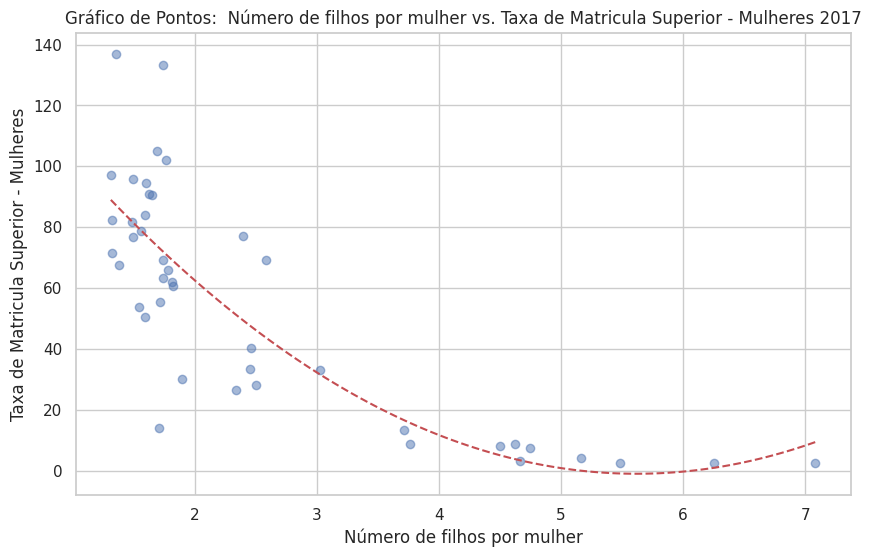

In [183]:
# Criar o gráfico de pontos
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['2017'], merged_df['Taxa Matricula Superior Mulheres'], alpha=0.5)
plt.title('Gráfico de Pontos:  Número de filhos por mulher vs. Taxa de Matricula Superior - Mulheres 2017')
plt.xlabel('Número de filhos por mulher')
plt.ylabel('Taxa de Matricula Superior - Mulheres')
plt.grid(True)

z = np.polyfit(merged_df['2017'], merged_df['Taxa Matricula Superior Mulheres'], 2)
p = np.poly1d(z)
xp = np.linspace(min(merged_df['2017']), max(merged_df['2017']), 100)
plt.plot(xp, p(xp), "r--")

plt.show()

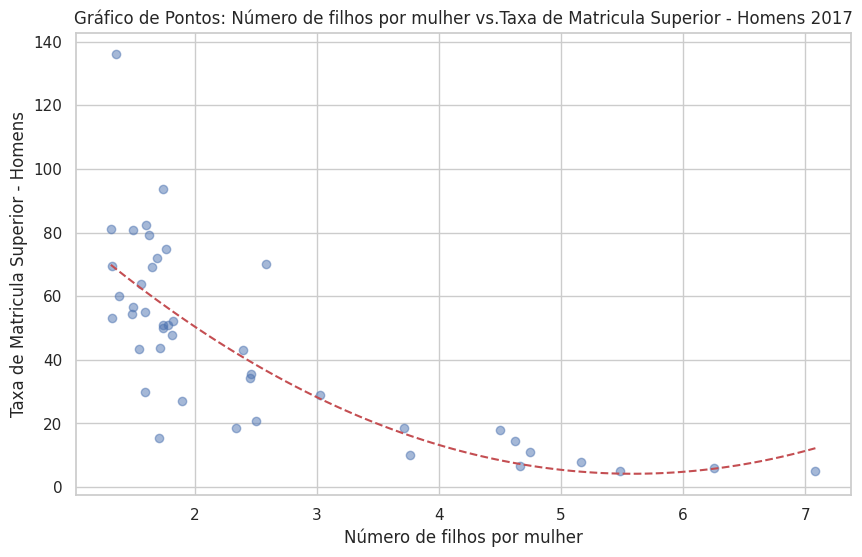

In [184]:
# Criar o gráfico de pontos
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['2017'], merged_df['Taxa Matricula Superior Homens'], alpha=0.5)
plt.title('Gráfico de Pontos: Número de filhos por mulher vs.Taxa de Matricula Superior - Homens 2017')
plt.xlabel('Número de filhos por mulher')
plt.ylabel('Taxa de Matricula Superior - Homens')
plt.grid(True)

z = np.polyfit(merged_df['2017'], merged_df['Taxa Matricula Superior Homens'], 2)
p = np.poly1d(z)
xp = np.linspace(min(merged_df['2017']), max(merged_df['2017']), 100)
plt.plot(xp, p(xp), "r--")

plt.show()